# Find brain states using Hidden Markov Model
In this notebook there are functions and their explanations for finding hidden brain states using Hidden Markov Models (HMM) for datas stored in a three dimensional numpy array or a list. The core codes are developed in the Lab of Linderman, see [here](https://web.stanford.edu/~swl1/#williams2021generalized). An example of their papers in which they use a HMM you find [here](https://www.biorxiv.org/content/10.1101/621540v1).



**Getting started**

You have to install the codes from their github repository, see [here](https://github.com/lindermanlab/ssm). In this repository you will find a detailed description of how to download the codes (it works!), additionaly a lot of information concerning Hidden Markov Models and examples are given with detailed descriptions.

This notebook additionly uses some helper functions which are stored in .py files. These .py files together with the data collected by Dr. Y. Galleros-Salas, see [here](https://www.sciencedirect.com/science/article/pii/S0896627320308138), and preprocessed by Aleksejs Fomins (stored in a H5py container) are bundled in folders: Yasir data mouse 5, Yasir data mouse 6, Yasir data mouse 7, and Yasir data mouse 9. You find these folders on our workspase "neurophysiology", in the subfolder "Transfer/Susanne/HMM brainstates". Copy these folders into your JuptiterNotebooks folder. For example if you want to analyse the data for mouse 5 (please note that the mice are renamed in the paper mentioned above: M5 (data) --> M2(paper), M6(data) --> M4(paper), M7(data) --> M5(paper) and M9(data) --> M3(paper)) it is recommended that your working directory is the "Yasir data mouse 5" directory. This ensures that, if you want to save plots, they are stored there in automatically generated subdirectories of this directory. It is technically possible to analyse the data of all mice from one of the directories (e.g. current directory: "Yasir data mouse 5" from there you can analyse M6 data, but then the automatically created subfolder for M6 plots will be subfolders of "Yasir data mouse 5" and not of "Yasir data mouse 6"). It is also possible to fit the model to all mice (and all trial types) from the working directory "Yasir data mouse 5",e.g., but again the analysed/stored plots for e.g. M6 is in a subfolder of "Yasir data mouse 5" and not "Yasir data mouse 6".


If you have your own datas to analyse, you also have to copy one of these folders to your JupiterNotebooks because they not only contain the data but also the functions calling the core codes for fitting, finding the most probable brain states and helper functions. But you can delete the files containing the data (.h5 file) and metadata (eg. mouse_5_2017_03_06_session01, etc). Introduce your data in block 4, it has to be a 3d numpy array or a list of single trials as explained below. In addition some variables have to be defined, such as "name", "trial_type", "frames", "delay", "title" and "file". These are used for the titles of the plots and the names of the files in which they are automatically stored, see arguments for the plot functions. Of course you can also change the plotting functions in the .py files or introduce your own plotting functions.

The codes in this notebook uses phyton version 3.6.


**Structure of the notebook**

First one has to define which sessions are included in the fitting procedure and in the algorithm for finding the most probable state sequence (viterbi algorithm). The arrays have to match in one or more dimensions therefore not all combinations of sessions are always allowed if you would like to use averaged data (3d array, shape (trials, time steps, dimensions). If you would like to work with concatenated data, all combinations are allowed (list, elements are single trials, 2d arrays(time steps, dimensions). In a behavior task a session contains usually several trial types, e.g. in the data of Dr. Galleros-Salas: Hit, FA, CR, Early and Miss. The brain states and/or the brain state sequence of different trial types are at least partially different. Therefore in the selected sessions usually trials of a specific type are taken. But it can be interesting to fit the model to all, unsorted trials and analyse sorted data with the viterbi algorithm using the model fitted to all data. The option 'All' is therefore also included. Next, the data of the selected sessions and trial type are gathered in a 3d array "data" or in a list "lst_obs". These steps are done in code blocks 1 to 4 and can be skipped if you do not work with Dr. Galleros-Salas's data. Remark: the expression "time_steps" and "frames" are both used in this notebook and define both a metric for time. The length of a trial (the shape of the 3d array, axis = 1, respectively in the 2d array, axis = 0) is the largest frame/time_step number. One frame/time_step corresponds to 50 ms for Dr. Galeros-Salas's data, or 20 frames = 1 second.  

Next, the data are prepared for the fitting and for the viterbi code, Code blocks 5 to 8. There are different ways to prepare the data:

- *averaged data:*<br/> 
  The 3 dimensional array "data" is averaged over axis 0 (trials). The result is a 2 dimensional array of shape               (time_steps, ROI's). This array "obs_aver" can be used for fitting and for the viterbi algorithm.
  
- *concatenated data:* <br/>
  All trials are concatenated along axis 1 (time_steps) for the 3d array or axis 0 in the case of list elements. The result   is a 2 dimensional array of shape (number of trials x time_steps, ROI's). This array "obs_conc" can be used for fitting.
  
- *single trial data:* <br/>
  You can also use the data of one single trial which is a 2 dimensional array of shape (time_steps, ROI's). This array       "obs_single" can be used for the viterbi algorithm. 


You have the possibility to look at these prepared data and save the plots. You can use block 5 to do the preparations for all kind of data if you work with the 3d array "data" (averaged, concatenated and single trial) at once or you can do it individually, block 6 to 8. 

In the literature dimensionality reduction is strongly recommended. Here you will have two methods for that purpose: Factor Analysing (FA) and Principle Component Analysis (PCA). Again you can look at these preprocessed data and save the plots, code blocks 9 to 13 for FA. You can do the FA for all kind of data (if you did the prepartions also vor all of them) in block 9. Block 10 to 12 allow individual FA. You additionally have the possiblity to do FA on each trial individually, block 13, the result is a list of dimensionality reduced single trials (shape of an element: (time steps, number of factors). PCA starts at block 14 for all kind of data at once and individually in block 15 to 17.


After these preparation/preprocessing steps the fitting of the Hidden Markov Model (HMM) on these prepared/preprocessed data can be done, blocks 18 and 19. You have the possibility to plot/save the fitting curve. This is recommended, to check if the number of iterations is sufficient to get a stable likelihood (50 to 100 iterations usually is enough). If you choose to save the figure, all the upcoming figures are saved. The model can be fitted in principle on any kind of prepared/preprocessed data. But to fit a model to single trial data makes not much sense. Recommended are averaged data (fast, good overview) or concatenated data. In the case of FA or non dimensionality reduced data one can also use a list of single trials which is accepted as an input to the fitting algorithm. Therein the elements of the list are concatenated. That is why the shape of axis 2 (number of factors or ROI's) has to be the same in all elements of the list. A summary of all kind of prepared/preprocessed data is given. Some parameters have to be defined as input to the fitting function (block 18a) and you have to choose the matching function for your data for the fit (block 18b1). You will also be asked to define the data on which the viterbi algorithm has to operate on and to choose the matching function for the viterbi algorithm (block 18b2). You will have an opportunity to change this later, if you want to work with the same fitted model on different datas, e.g. divers single trial data, which have to be selected/prepared/preprossed first according to the example work flow given below.


The code block 20 runs the viterbi algorithm returning the most probable state sequence to explain the given observations in form of a list of state numbers and (optional) a plot representing each state number with a color. 


The next three blocks are optional: You can calculate and plot the state occupation time (block 21), plot the prepared and preprocessed data shaded with the state sequence (block 22) and calculate/plot the learned transition matrix (block 23).

The calculation (and plot) of the posterior probabilty (the probability being in a state at a specific time step given the observations seen so far), block 24, is mandatory for the following calculations of the brain states. 


The following block 25 is optional. It is interactive and allows to compare two vectors holding the original dF/F's for all ROI's with a simple metric (manhattan distance). You can also define precisly at which frame/time_step a state starts or ends, which is neeeded for the manually definition of substates of a brain state. For detailed information about this block, see there.

The abstract hidden states are mapped onto brain states in block 26. You have several options to plot/save the brain states. The software to map a vector holding averaged dF/F values on an anatomical brain map is written by Aleksejs Fomins (brainplot_selfcontained.py, example.ipynb, L_modified.mat). 


Finally you have the possibilty to analyse the substates. A brain state can be splittet over different not connected segments of frames. Such an individual segment is called a substate. Again you can plot/save them in block 27. There are two options: to select the substate of a specific brain state automatically (all substates are selected) or manually (you can define which substates are selected).


**workflow: Example 1, averaged data fit, single trial data**

If you would like to have a quick glance at the most probable hidden state sequence in your data you can work with averaged data for the fit as well as for the viterbi algorithm. Working with averaged data was proven to give reliable results in the case of Dr. Galeros-Salas's data. The most simple case is running the fitting and the viterbi algorithm on the same (averaged) data. For that:

- *get the data:*<br/>
   define which data should be taken: block 1 to 4 --> "data"<br/><br/>

- *data preparation:*<br/>
   calculate the mean: block 6  --> "obs_aver"<br/><br/>
   
- *data preprocessing:* <br/>
   calculate the factors for averaged data: block 10 --> "obs_transformed_FA"<br/>
   or<br/>
   calculate the PC's for averaged data: block 15  --> "obs_transformed_PCA"<br/><br/>
   
- *fitting:*  <br/>
   define some parameter as input (block 18a) 
   choose the corresponding function to get the data for fitting (obs_fit): block 18b1  <br/>
   choose the corresponding function to get the data for viterbi algorithm (obs_vit): block 18b2  <br/>
   do the fitting on this data ("obs_fit"): block 19 --> "hmm, hmm_lls"  <br/>
   remark: "obs_fit" and "obs_vit" are same for in this example, but "obs_vit " can be changed later, (see below)    <br/><br/>
   
- *viterbi algorithm:*<br/>
   find most probable state sequence on "obs_vit": block 20 --> "viterbi_states <br/><br/>
   
- *posterior probability:*<br/>
   calculate the posterior probability: block 24 --> "posterior_probs" <br/><br/>
   
- *brain states:*   <br/>
   mapping of the abstract states on brain states: block 26 --> plots of brain states
   
   
In the above example the fitting and the viterbi algorithm run on the same data e.g. "obs_transformed_FA" aka "obs_fit/obs_vit". As mentioned above the viterbi algorithm, once the parameter thereof are learned, can run on different data. For that you have to go back to do the input and/or preparation and preprocessing steps for the this (new) data. Here for example one can look for the most probable state sequence/brain states for single trials, but keep the model fitted to the averaged data. Please note that the data being used to fit the model and the data on which the viterbi algorithm runs should have to be preprocessed in the same way (either not at all, FA or PCA). Further the dimensions (axis = 1 in the 2d array) after the preprocessing step should be the same, otherwise errors will occur later. This is not always the case for the same eigenvalue limit (FA) or the explained variance (PCA). To correct for that: You change the variable "eigenval_limit" for FA to a different value (default 1.0) or the variable "tot_expl_variance" for PCA (default 0.99) until the desired dimension is generated. Further please note that if you want to *reuse the learned parameter you are not allowed to close your notebook (closing the notebook: the variables get lost).* 


To analyse different data, here in this example, a single trial with the viterbi algorithm (fitting was on averaged data), for that go back to:

- *data preparation:*<br/>
   take single trial: block 8  --> "obs_single"<br/><br/>
   
- *data preprossesing:* <br/>
   calculate the factors for single trials: block 12 --> "obs_transformed_FA_s"<br/>
   or<br/>
   calculate the PC's for single trials: block 17  --> "obs_transformed_PCA_s"<br/> <br/>  
   
- *viterbi algorithm:*<br/>
   change the function to get data for viterbi algorithm (obs_vit, from average to single): block 18b2 <br/>
   go directly to block 20, skipping the fitting (block 19). 
   find most probable state sequence: block 20 --> "viterbi_states <br/> <br/>
   
- further analysis as before.  
   
**workflow: Example 2, working with trials of different time steps and/or delays but the same mouse for fitting (e.g. Mouse 6)**  

If you would like to fit the model to one mouse (e.g. M6) data with different different time steps and/or delays, and use the learned parameter for the viterbi algorithm which runs over data with the same time steps and/or delays, do the following:

- *get the data:*<br/>
   define which data should be taken: block 1 to 4 --> "data"<br/>
   Use block 1b and 3b to define the "lst_sessions" (block 3b allows combinations of different session lists, even for different mice, see instructions there) and 4b (get the list "lst_obs").<br/><br/>
   
- *data preparation and preprocessing:* <br/>
    for sessions with different time steps, averages is not possible, use concatenated data. 
    calculate the factors for concatenaed data: block 11 --> "obs_transformed_FA_c"<br/>
   or<br/>
   calculate the PC's for concatenated data: block 16  --> "obs_transformed_PCA_c"<br/><br/>
   
   
- *prepare fitting:*  <br/>
   define some parameter as input for fitting and viterbi algorithm (block 18a) <br/>
   choose the corresponding function to get the data for fitting (obs_fit): block 18b1  <br/>
   **But now go back to block 1b/1c/2/3a/** and define the lst_sessions (e.g. only take the sessions with the same number of time steps/delay for the viterbi algorithm), and run block 4a (get the array "data").<br/><br/>
   
- *data preparation and preprocessing:* <br/>
   for this newly defined data for the viterbi algorithm as described above, but now for example FA on averaged data. <br/><br/>

- *fitting:*  <br/>
   go **directly to block 18b2** and define the corresponding function to get the data for viterbi algorithm (obs_vit): block   18b2  <br/>
   Now you have defined the variables "obs_fit" (e.g. data for all time steps/delays for fitting) and "obs_vit" (e.g. data with the same time steps/delay for the viterbi algorithm) and you can proceed to block 19 and 20 (and all the following blocks for analysing the results).<br/><br/>
   
 
**workflow: Example 3, working with data from different mice for fitting**

There are examples of brain state analysis in the literature (e.g. [here](https://www.pnas.org/content/114/48/12827) in which datas of all subjects studied are concatenated for the fitting procedure in one very long vector. You can do the same with this notebook. The data for different mice are stored in different H5py containers. To collect the data from these different containers the blocks 1 to 4 have to be runned "in a loop" for all mice. In addition because the trials in Dr. Galleros-Salas's data have not all the same number of frames, averaged methods (3d array, mean over axis=0) in this case do not work. 

- *get the data* as a loop over different mice:<br/>
run block 1a (defines a list "lst_obs_all", the elements are the 3d data arrays for each selected mice, which are appended in block 4c) <br/>
Select the first mouse and the trial type in block 1b.  <br/>
run block 3b (get "lst_sessions", see instructions there)<br/>
run block 4c (get "lst_obs", see instructions there)<br/>
**go back to block 1b** and define the next mouse (*do not run block 1a*, there the trials of the first selected mouse are stored and the upcoming trials for other mice will be appended)<br/>
proceed the same way as with the first mouse (define list of sessions in 3b and the list of observations in 4b)<br/>
repeat this procedure until all mice you want to include are done. As a check you will see the length of the list "lst_obs_all" growing.<br/><br/>

- *data preparation:*<br/>
run block 7b for concatenation of the list "lst_obs" elements<br/><br/>

- *data preprossesing:*<br/>
for dimensionality reduction run block 11a (FA) or block 16a and 16c (PCA) for concatenated data.<br/><br/>

- *prepare fitting:*<br/>
run blocks 18a and 18b1 for the preparations for fitting<br/>
 **go back to block 1b/1c** to define the data you want to use as input for the viterbi algorithm as described in the example 2. Take care of the dimensions, they should be the same for the data on which the fit runs as for the data on which the viterbi algorithm runs. It can be regulated as described above and below. <br/><br/>

- *data preparation and preprocessing:* <br/>
 for this newly defined data for the viterbi algorithm as described above, for example FA on averaged data.<br/><br/>

- *fitting:*
go **directly to block 18b2** and define the corresponding function to get the data for viterbi algorithm (obs_vit)<br/><br/>

Now you have defined the variables "obs_fit" (e.g. data for all mice and all trial types) and "obs_vit" (e.g. averaged data for only one mouse/number of time steps/delay for the viterbi algorithm, or just one single trial) and you can proceed to block 19 and 20 (and all the following blocks for analysing the results).
   

# Import section

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
from ipywidgets import interact, interactive, fixed, interact_manual,Layout

In [ ]:
sys.path.append(r'C:\Users\Susanne Valavanis\PyCharmProjects\MyHMM')

from data_import import *
from preprocessing import *
from session_lists import *
from plots import *
from fit_and_viterbi  import *
from widget_to_play  import *
from map_to_brain  import *
from brainplot_selfcontained import *

# Creation of the 3d data array "data" or the list of single trials "lst_obs"

**General remarks**

The following blocks of code are used if you would like to work with Yasir's mouse 5,6,7 and 9 data.

If you would like to use other data, you either can organize your data in the form of a 3 dimensional numpy array
with:

- axis = 0   --> trials
- axis = 1   --> timesteps/frames
- axis = 2   --> dimensions (ROI's)

and name this array : "data" and start with code block 5. Or you can create a list of single trials and name it "lst_obs". The elements of this list should be 2 dimensionals arrays with:

- axis = 0    --> timesteps/frames
- axis = 1    --> dimensions (ROI's)

In this case  you won't be able to work with averaged data but it has the advantage to analyse trials with different number of frames/time steps. If you have your data in a 3d data array it is possible later to change it to a list of single trials in this notebook. Please note that if you work with your own data, you have to define some variables such as "name", "trial_type", "frames", "delay", "title" and "file", adapt the plotting functions or define your own plotting functions. These variables are used as arguments for the plotting functions to automatically define the titles and the file names. 

The folder structure is as follows:
Load the following folders into a subdirectory of your JupyterNotebooks. For example:
" 'C:/Users/Susanne Valavanis/JupyterNotebooks/HMM/eigene HMM/". In code block 4 you will have to specify the path to this subfolder. The following folders are then subfolders of the folder "eigene HMM".

folders: 
- Yasir data mouse 5 (containing the data M5, metafiles, all necessary pycharm.py files and notebooks.ipynb)
- Yasir data mouse 6 (containing the data M6, metafiles, all necessary pycharm.py files and notebooks.ipynb)
- Yasir data mouse 7 (containing the data M7, metafiles, all necessary pycharm.py files and notebooks.ipynb)
- Yasir data mouse 9 (containing the data M9, metafiles, all necessary pycharm.py files and notebooks.ipynb)

Yasir's mouse/meta data:
Mouse data and metadata are in different files:

- Mouse 5: Yasir data mouse 5 (data in file "mou_5.h5", metadata in  "mouse_5_2017_03_06_session01",... per session)
- Mouse 6: Yasir data mouse 6 (data in file "mou_6.h5", metadata in  "mouse_6_20170925_c",... per session)
- Mouse 7: Yasir data mouse 7 (data in file "mou_7.h5", metadata in  "mouse_7_20171114_c",... per session)
- Mouse 6: Yasir data mouse 9 (data in file "mou_9.h5", metadata in  "mouse_9_20180301_a",... per session)

                  
If there are figures to save, these figures are saved in the current folder. If you work with M6 data for example and start in the Yasir data mouse 6 directory which is then the current one, all the figures are saved there. As explained above, if you don't care in which directory the plots are saved, you can start from anyone of these folders for analysing data from all mice.

After you defined which Mouse/sessions you want to examine (code block 1 to 3), the code block 4 generates the 3 dimensional data (called "data") or the list ("lst_obs") for sessions with different number of frames but the same mouse and the list for sessions from different mice ("lst_obs", in a loop) array automatically.

The number of frames/time_steps has to be found as the lenghts over the data array (3d array: axis = 1, list element: axis = 0). The delay has to be extracted from the files stored in Dr. Y. Galleros-Salas's original files (storage server). The result is summarized in the table bellow:
 

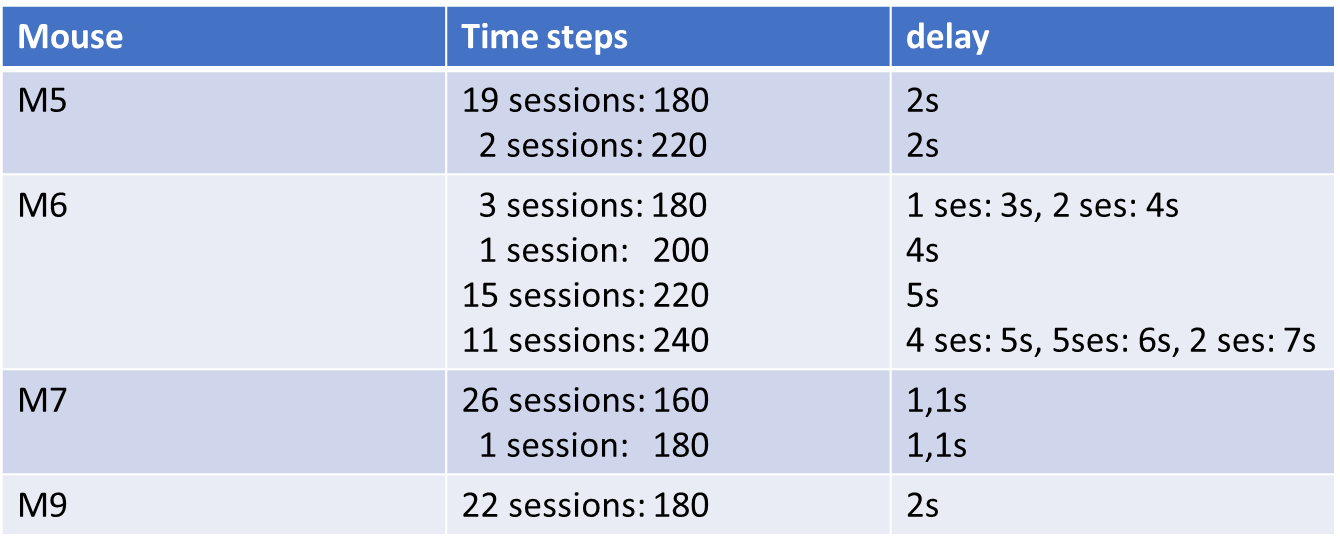

**Preparing the list holding the sessions to be analysed**

To create the list of sessions to build the 3 dimensional data array ('data') or the lists (lst_obs) run the following input block 1b which takes as input the Mouse name you would like to examine and the trial type (mandatory for fitting and viterbi algorithm):

1. Choose a mouse (just two key strokes, a "empty" keystroke after Mx will cause an error):
    - for Mouse 5, type: M5
    - for Mouse 6, type: M6 
    - for Mouse 7, type: M7
    - for Mouse 9, type: M9.
    

2. Choose a trial typ: Hit, CR, FA, Early, Miss or All.<br/> 
   "All" has to be taken if the the model should be fitted to all data.
   
   
Block 1c takes as input the number of time steps/frames and the delay. This is only mandatory for the data on which the viterbi algorithm runs and is used for titles of the plots and names of the files saving these plots.  

1. Choose the number of frames/timesteps according to the above table.

2. Choose the delay in seconds according to the above table. 

If you would like to have other combinations of sessions or single sessions (using block 3b):
You can read them from the h5py file, print and define them, or parts of them as "lst_sessions" or copy them as arguments for the function "get_list_sessions_2", see block 3b:

Lists holding the sessions sorted by time steps/frames:<br/>

- *160 time steps:* 
    - lst_sessions_160_M7<br/><br/>

- *180 time steps:*
    - lst_sessions_180_M5, lst_sessions_180_M6, lst_sessions_180_M7, lst_sessions_180_M9, lst_sessions_180_M9_red<br/><br/>

- *200 time steps:*
    - lst_sessions_200_M6<br/><br/>

- *220 time steps:*
    - lst_sessions_220_M5, lst_sessions_220_M6<br/><br/>

- *240 time steps:*
    - lst_sessions_240_M6_5,
    - lst_sessions_240_M6_6,
    - lst_sessions_240_M6_7,<br/>
    
    
Lists holding the sessions sorted by mice:<br/>

- *Mouse 5:*
    - lst_sessions_180_M5, lst_sessions_220_M5<br/><br/>

- *Mouse 6:*
     - lst_sessions_180_M6, lst_sessions_200_M6, lst_sessions_220_M6, lst_sessions_240_M6_5, lst_sessions_240_M6_6,     lst_sessions_240_M6_7<br/><br/>

- *Mouse 7:*
    - lst_sessions_160_M7, lst_sessions_180_M7<br/><br/>

- *Mouse 9:*
    - lst_sessions_180_M9, lst_sessions_180_M9_red<br/><br/>
     
The list "lst_sessions_180_M9_red" is a reduced version of the list "lst_sessions_180_M9". It can be used for M9 Hit trials. M9 Hit trials over all sessions of M9 will result in surprising (not expected, confusing) results. The reduced version of the list still produces not the most convincing results for Hit trials in M9, but better then the complete list. May be there are some confounders in that data. The other trial typ data from all M9 sessions behave as expected.

Block 1, 3 and 4 are mandatory.

# Block 1: Input for Mouse data 

**Block 1a** is used for the definition of a list "lst_obs_all", elements of which are the 3d array of data for one mouse. This list is only used if you plan to work with data from more than one mouse for fitting. **Block 1b** is mandatory. It gets the Mouse name and the trial type. It is used for getting the data from the H5py files. **Block1c**  gets the number of frames and delay in seconds. It is used for the titles of the plots and the names of the files storing the plots and is mandatory for analysing the data with the viterbi algorithm because the results are showed as plots.

If you plan to run the viterbi algorithm on other data as are used to fit the model (e.g. you fit the model on all mice data using block 1 to 4 in a loop, but you are interested in the most probable hidden state sequence of the average of data stored in lst_sessions_180_M5) you give as input the name and the trial type of the first mouse in block 1b, proceed to 3b and 4c, repeat this until the data of all mice you like are defined. Proceed to data preparation/preprocessing and parameter selection for fitting (block 18a) and choose the appropriate function (block 18b1). Then you have go back to select the data for the viterbi algorithm. Again use block 1b to select the mouse and trial type but now you also have to define the number of frames and delay in block 1c. 

In [ ]:
#Block 1a, mandatory: if you plan to fit the model to data for more than one mouse
lst_obs_all = []

In [ ]:
#Block 1b, mandatory: input (Mouse, trial type)
name = get_and_check_mouse_name()
trial_type = get_and_check_trial_type()

In [ ]:
# Block 1c, mandatory: input viterbi algorithm (number of frames, trial type)
frames = get_and_check_frame_number(name)
delay = get_and_check_delay_all(name,frames)

# Block 2: Check input#

Block 2 is optional. You can check the input data for the viterbi algorithm.

In [ ]:
#Block 2, optional: check the input
print_to_check(name, trial_type, frames, delay)

# Block 3: Creation of the list of sessions "lst_sessions"

Block 3 is mandatory. Run it to create the list of sessions for the mouse defined above and print it to control/to have an overview. **Block 3a** gets the list according to the defined input in block 1b/1c automatically. **Block 3b** allows to create a list of your own. It will overwrite the selected list in block 1 if you already have runned 3a. In the text above all possible lists are summarized. To create a new list just copy the desired lists (make a copy from the text above) as arguments into the function "get_lst_sessions_2". Please note that if you want to work with an average over the data, the list bundled together in block 3b must have the same number of frames/time_steps. If you want to add sessions with a different number of frames for concatenated data for example, you can do that also in block 3b but in this case you have to use block 4b (for the same mouse) or 4c for different mice to create a list of single trials instead of using block 4a generating a 3d array.

You can also open a new block and just type "print(lst_sessions_180_M6)" for example. You will get all the sessions for Mouse 6 with 180 time steps/frames. You can choose the sessions you want to create your own list "lst_sessions". For example if you would like to look just at one specific session (example block).

To check the defined "lst_sessions" in both blocks a print of the list "lst_sessions" and its lenght is given.

In [ ]:
#Block 3a: creates automatically a list of sessions according to the input above
lst_sessions = get_lst_sessions(name, frames, delay, trial_type)

In [ ]:
#Block 3b: create your own list of sessions, will overrule the list selected in Block one.  

lst_sessions = get_list_sessions_2(lst_sessions_180_M6, lst_sessions_200_M6, lst_sessions_220_M6, lst_sessions_240_M6_5, lst_sessions_240_M6_6, lst_sessions_240_M6_7)

In [ ]:
#example block to create our own lst_sessions for only some specific sessions
print(lst_sessions_180_M6)
lst_sessions = ['20170925_c']

**Creation of the 3 dimensional data array (allowing for averaged data) or a list of single trials**

The function "get_data_1" creates the 3 dimensional data array "data" for the Mouse/sessions you selected above in block 1b/1c and 3a or 3b° (°only if you take sessions with the same number of frames). The function reads the data from the H5py File. The path to that file has to be specified in the variable "path" in the next block (block 4). The function scrolls through the "lst_sessions" (created in the block 3a/b above) containing all the sessions which will be studied. Only the trial types, specified in block 1b are taken (if you selected "All", all trials are taken). Maybe you took sessions for fitting which do not have the same number of frames in block 3b. In that case a list of single trials is generated (function "get_data_2", block 4b) or you want the fit over different mice (function "get_data_3", block 4c, used in a loop). In these two cases averaged data cannot be calculated. 


# Block 4: Creation of the 3 dim array "data" or the list "lst_obs"

This block is mandatory. Run **block 4a** for the creation of the 3 dim array "data". The creation of a list "lst_obs" allowing for sessions with different number of frames, **block 4b**, or for the creation of the list "lst_obs" holding the single trials for different mice, **block 4c**, in a loop. In each case you get a print out to check. In the case of block 4c the print delivers the actual length of the list (each loop cycle will add more trials). Maybe you have to adapt the path to your file structure.

If you work with a list, averaged data is not possible and you have to proceed directly to block 7b (concatenated data; remark: data stored in a 3d array can also be concatenated (block 7a). You have the possibility to change the trial typ without going back to block 1b, e.g. after fitting the model to all trial typs but running the viterbi algorithm on Hit trial types for the same selected sessions in in "lst_sessions". Unhash the code line 8 and plug in the desired trial type ('Hit','CR', 'FA', 'Early', 'Miss'). 

In [ ]:
#Block 4a, 3 dim array "data" for list of sessions with the number of frames
#adapt to your path:
path = 'C:/Users/Susanne Valavanis/JupyterNotebooks/HMM/eigene HMM/'
file, label =  get_file_and_label(name)
path = get_path(path, file)

#To change the trial type: 
#trial_type = 'CR'

#function to get the 3 dimensional "data" array for the selected Mouse, sessions, trial types: 
data = get_data_1(lst_sessions, path, label, trial_type)
nice_print(data, trial_type)

In [ ]:
#block 4b, list of single trials for a list of sessions with different number frames, same mouse (no averaged data possible)
#adapt to your path:
path = 'C:/Users/Susanne Valavanis/JupyterNotebooks/HMM/eigene HMM/'
file, label =  get_file_and_label(name)
path = get_path(path, file)

#To change the trial type: 
#trial_type = 'CR'

#function to generate the list of single trials for the selected Mouse, sessions, trial types: 
lst_obs = get_data_2(lst_sessions, path, label, trial_type)
nice_print_2(lst_obs, trial_type)


In [ ]:
#block 4c, list of single trials for a list of sessions with different number frames, different mice (no averaged
#data possible), use it in a loop for each mouse (next mouse, go back to block 1b)
#adapt to your path:
path = 'C:/Users/Susanne Valavanis/JupyterNotebooks/HMM/eigene HMM/'
file, label =  get_file_and_label(name)
path = get_path(path, file)

#function to generate the list of single trials for the selected Mouse, sessions, trial types: 
lst_obs = get_data_3(lst_obs_all, lst_sessions, path, label, trial_type)
#nice_print_2(lst_obs, trial_type)

#  Data preparations for fitting and viterbi algorithm

You can prepare your data in different ways:

1. **averaged data, for fitting and/or viterbi algorithm, block 5 and block 6:**<br/>
The mean over the axis 0 of the 3 dimensional array "data" is taken to produce a 2 dimensional array (time steps, dimensions). Data arrays of different dimension in axis 1 (time steps) and axis 2 (dimensions/ROIs) cannot be taken into the mean calculation (over axis 0), therefore the averaged data can only be applied to sessions with the same time steps (and same dimensions/Rois). <br/> --> function "mean_data", returning "obs_aver"


2. **concatenated data and multi-trial data list for fitting, block 5 and block 7:**<br/>
In the first step a list of single trials will be generated (if you used block 4b/4c, this is already done, use in this case block 7b). The list is called "lst_obs". The length of the list is the number of trials (shape of axis 0). The number of times steps of the trials (axis 1) can be different. But the dimensions (axis 2) has to be identical (because of following calculations). Next the list elements are concatenated to a 2 dimensional (long) array. Remark: the core code can take lists, the elements of which are later concatenated in the core code (e.g. block 13 generates a list of dimensionality reduced single trials which can be used as input for the fitting).<br/> --> function "generate_data_list", returning "lst_obs"<br/>--> function "concatenate", returning "obs_conc"


3. **single trial for viterbi algorithm, block 5 and block 8:** <br/>
Fitting of a model to the data of one single trial makes not much sense (technically it would be possible). But finding the hidden states in the data of one single trial with the help of the viterbi algotithm using the learned parameters (Baum Welche algorithm) on averaged data or concatenated/multi-trial data/different mice can be of interest. Block 8 takes as input the index of the trial to be analysed and returns the 2 dimensional array holding the dF/F for that trial.<br/>--> function "get_and_check_trial_number", returning "trial_index"  <br/> --> function "single_trial_data", returning "obs_single" 

In the blocks 5 to 17 you have the possibility to have a look at the shape of the resulting array/list elements:<br/> for print out: prnt = True, <br/>no print out: prnt = False. 

For the data you choose for the viterbi algorithm (defined with block 1b *and* 1c) you have the possibility to look at the prepared data as a plot of the dF/F versus frames/time_bins for all the dimensions (ROI's). You have also the possibility to save the figures: <br/>for save figure: save_figure = True,<br/>otherwise:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; save_figure = False. <br/> 

If you choose save_figure = True, the figures are saved in a subfolder "Mx (x for 5,6,7 or 9) plots data" of the working directory.

If "True", the figures are saved in a subfolder (newly created, if it does not already exist) of the current directory with the name "Mx plots data" (x: 5,6,7 or 9).  The plots are stored as .png files (e.g. M5_Hit_averaged_2021-12-26_run0.png). To avoid overwriting, if you run the function twice with the same mouse name (e.g.:M5), same trial type (e.g.:Hit) and same kind of data (averaged, concatenated or single) you can change the number of runs:<br/>default: run=0,<br/> change to run=1 etc. 

You can run in one block all three kinds of data preparations in block 5a and plot/save all of them in block 5b if your data is stored in "data". For individual preparations, e.g. if you use "lst_obs" use blocks 6 to 8, depending which kind of preparation you would like.



# Block 5: Data preparation, all types for  "data"

Types are:<br/> 
averaged&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; --> "obs_aver",<br/>
concatenated --> "obs_conc" and <br/>
single trial&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; --> "obs_single".

Block 5a calculates the arrays (mandatory, if not individual calculation is planed), block 5b plots/(saves the plot) the result (optional). Plots are only possible for the data defined for the viterbi algorithm (using block 1b *and* 1c). If you want to save the plot:<br/>
save_figure = True, otherwise:<br/>
save_figure = False.<br/>
To avoid overwriting if you run a plot for exact the same parameters at the same day: change the number of runs.

In [ ]:
#block 5a, returns a 2 dimensional arrays called: "obs_aver", "obs_conc" or "obs_single"

#averaged:
obs_aver = mean_data(data, prnt = True)

#concatenated:
#generate the list for concatenated data:
lst_obs = generate_data_list(data, prnt = True)
#concatenate the lst_obs
obs_conc = concatenate(lst_obs, prnt = True)

#single trial:
#get the index of the requested trial:
trial_index = get_and_check_trial_number(data)

#take that trial out of the 3d data array (--> 2d array):
obs_single = single_trial_data(trial_index, data, prnt = True)

In [ ]:
#Block 5b, optional: plot of the prepared data. Only for data for the viterbi algorithm (defined in 
#block 1b and 1c) 
save_figure = True

# - averaged "obs"
fig = plot_data(obs_aver, name, trial_type, frames, delay, trial_index, save_figure, file, title='averaged',
                run=0, kind_data=0, kind_prepro='nil')

# - concatenated "obs_conc"
fig = plot_data(obs_conc, name, trial_type,frames, delay, trial_index, save_figure, file, title='concatenated',
                run=0, kind_data=2, kind_prepro='nil')

# - single trial "obs_single"
fig = plot_data(obs_single, name, trial_type, frames, delay,trial_index, save_figure, file, title='single trial',
                run=0,  kind_data=1, kind_prepro='nil')

# Block 6: averaged data, individually

**Block 6a** is mandatory for averaged data (for fitting and/or viterbi algorithm, the 3d array "data" has to be defined before) and block 5a ist not runned. The result is a 2 dimensional array called "obs_aver". **Block 6b** plots/(saves the plot) the result, optional. Plots are only possible for the data defined for the viterbi algorithm (using block 1b and 1c). Remarks about plotting, see block 5b.

In [ ]:
#Block 6a, mandatory for averaged data individually:
obs_aver = mean_data(data, prnt = True)

In [ ]:
#Block 6b, optional: plot/save of the averaged data. Only for data for the viterbi algorithm (defined in 
#block 1b and 1c)  
save_figure = True
fig = plot_data_1(obs_aver, name, trial_type, frames, delay, save_figure, file, title='averaged', run=0 )

# Block 7: concatenated data, individually

**Block 7a** is mandatory for concatenated data (for fitting) and block 5a ist not runned. **Block 7b** is for concatenating the data if you generated a list of single trials of sessions with different numbers of frames and/or different mice in block 3b/4b/4c ("lst_obs" exists already).  **Block 7c** plots/(saves the plot) the result, optional. Plots are only possible for the data defined for the viterbi algorithm (using block 1b and 1c). Remarks about plotting, see block 5b.

In [ ]:
#Block 7a, mandatory for concatenated data individually:

#generate the list of trials for concatenated data:
lst_obs = generate_data_list(data, prnt = True)

#concatenate the lst_obs
obs_conc = concatenate(lst_obs, prnt = True)

In [ ]:
#Block 7b, mandatory for concatenated data for a list of trials generated in block 4b/4c:

#concatenate the lst_obs generated in block 4b
obs_conc = concatenate(lst_obs, prnt = True)

In [ ]:
#Block 7c, optional: plot/save of the concatenated data. Only for data for the viterbi algorithm (defined in 
#block 1b and 1c)  
save_figure = True
fig = plot_data_1(obs_conc, name, trial_type, frames, delay, save_figure, file, title='concatenated', run=0, )

# Block 8: single trial data, individually

Block 8a is mandatory for single trial data (for viterbi algorithm, the 3d array "data" has to be defined before) and block 5a ist not runned. It takes as input the trial index. Block 8b plots/(saves the plot) the result, optional. Remarks about plotting, see block 5b.

In [ ]:
#Block 8a, mandatory if single trials are analysed:  

#get the index of the requested trial:
trial_index = get_and_check_trial_number(data)

#take that trial out of the 3d data array (--> 2d array):
obs_single = single_trial_data(trial_index, data, prnt = True)

In [ ]:
#Block 8b, optional: plot of the single trial data: 
save_figure = True
fig = plot_data(obs_single, name, trial_type, frames, delay, trial_index, save_figure, file, title='single trial',
                run=0,  kind_data=1, kind_prepro='nil')

# Preprocessing

In the literature a dimensionality reduction step is recommended although in principle the fitting can also be done on the full dimensional data array. Options are therefore:


1. **do the fit without preprocessing:**<br/>
  --> use "obs_aver" for average fitting input<br/>
  --> use "lst_obs" for multi-trial fitting input (computing time will be high).
                                                     

2. **Factor Analysing (FA):**<br/>
Factor Analysing is a generative model. A linear combination of weighted factors generate the observations. If the data are redundand, this method can be used to reduce the dimensions, because with only a few factors, the observations can be generated without a loss of information that matters. You have to choose the eigenvalue limit "eigenval_limit", the recommended/default value is 1.0. You can change this value. This is maybe necessary, if you fit the model to other data then you use as input for the viterbi algorithm because the dimensions (number of factors) have to be the same for both data. With the variable "eigenval_limit" you can regulate how many factors are taken. This can be compared to the explained variance in PCA. Factors with eigenvalues smaller then 1.0 do not contribute much information and could be ignored. The number of the factors taken is the new, reduced number of dimensions. In the Lab of Linderman FA is used [here](https://www.biorxiv.org/content/10.1101/621540v1). The following function uses the package FactorAnalyser:                
  --> function "find_number_of_Factors" to get the number of factors which generates the observations without loss <br/>
  --> function "factors" to generate this factors for "obs_aver" ,"obs_single" or "obs_conc" <br/>                             --> function "factors_lst" to produce the list of factors <br/> 
  blocks 9 to 13.
  

3.  **Principle Component Analysis (PCA):**<br/>
PCA projects the observations onto the first few principle components. The principle components are a weigthed linear combination of the observations. You have to choose the total explained variance "tot_expl_variance". You can change this value. This is maybe necessary, if you fit the model to other data then you use as input for the viterbi algorithm because the dimensions (number of components) have to be the same for both data. With the variable "tot_expl_variance" you can regulate how many components are taken. <br/>
  --> function "corr_matrix" to get the correlation matrix (find the number of main components)<br/>
  --> function "eigen_sorted" to get the sorted eigenvalues and eigenvectors                           
  --> function "number_of_main_components" to get the components explaining the requested variance  <br/>                     --> function "pca" to do the transformation using the sklearn package<br/> 
  blocks 14 to 17.
                            

As for the not preprocessed data you have the possibilty to have a look at the preprocessed data for the viterbi algorithm defined in block 1b *and* 1c. You can plot them and if you wish you can save them. For further comments block 5. If you choose save_figure = True, the figures are saved in a subfolder "Mx (x for 5,6,7 or 9) plots preprocessed" of the working directory.

If you have calculated all three types of data preparation with block 5a  you can also run the dimensionality reduction in one block for the three kinds of data preparations (block 9a for FA, block 14a for PCA) and plot/save all of them in block 9b or 14b. You also can do it individually in blocks 10 to 12 (FA) or in blocks 15 to 17 (PCA) as for the data preparation.

There is another possibility in the case of FA: You can calculate the factors for each trial individually and store the results in a list ("lst_obs_transformed_FA"), block 13. This will take some time (1 to 3 minutes). The number of factors for the same eigen value limit can be different for individual trials. But in this case the number of factors to be taken has to be fixed because otherwise the concatenation which is done in the core code (Linderman Lab) does not work. For Dr. Galleros_Salas's data 4 factors seem to enough for all trials. You can use the list "lst_obs_transformed_FA" for multi-trial fitting. 


# Block 9: Preprocessing with Factor Analysis, all types of preparations

**Block 9a** returns a dimensionality reduced version of all types of the prepared data with the shape (number of frames, number of ROI's) with the Factor Analysing (FA) method. An indicator how many factors are needed to generate the original data without a loss of information that matters is the eigenvalue limit. Choose the eigenvalue limit, the recommended value is 1.0 or a value that returns the requested dimensionality (for further comments see above).

Types are:<br/> 
averaged&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; --> "obs_transformed_FA",<br/>
concatenated --> "obs_transformed_FA_c" and <br/>
single trial&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; --> "obs_transformed_FA_s".

The calculation of the transformed arrays is done in block 9a. In block 9b you have the possibility to plot/(save the plot) the results, for more information, see block 5.

In [ ]:
#block 9a: preprocessing with FA for ALL types of data preparation 

#choose eigenvalue limit:
eigenval_limit = 1.0

# - avereaged data:
num_FA_dim = find_number_of_Factors(eigenval_limit, data.shape[2], obs_aver, trial_index, kind = 0, prnt = True)
#function to do the dimensionality reduction from dimensions to num_FA_dim and store the result in "obs_transfomed"
obs_transformed_FA = factors(num_FA_dim, obs_aver, kind = 0, prnt = True)

# - concatenated data:
num_FA_dim_c = find_number_of_Factors(eigenval_limit, data.shape[2], obs_conc, trial_index, kind = 2, prnt = True)
#function to do the dimensionality reduction from dimensions to num_FA_dim and store the result in "obs_transfomed_c"
obs_transformed_FA_c = factors(num_FA_dim_c, obs_conc, kind = 2, prnt = True)

# - single trial data:
num_FA_dim_s = find_number_of_Factors(eigenval_limit, data.shape[2], obs_single, trial_index, kind = 1, prnt = True)
#function to do the dimensionality reduction from dimensions to num_FA_dim and store the result in "obs_transfomed_s"
obs_transformed_FA_s = factors(num_FA_dim_s, obs_single, kind = 1, prnt = True)

In [ ]:
#Block 9b, optional: plot of the FA preprocessed data for all kinds of prepared data. Only for data for the viterbi
#algorithm (defined in block 1b and 1c).  
save_figure = True

# - averaged "obs_transformed_FA":
fig = plot_data(obs_transformed_FA, name, trial_type, frames, delay, trial_index, save_figure, file,
                title='averaged', run=0, kind_data=0, kind_prepro='FA')

# - concatenated "obs_transformed_FA_c":
fig = plot_data(obs_transformed_FA_c, name, trial_type,frames, delay, trial_index, save_figure, file,
                title='concatenated', run=0, kind_data=2, kind_prepro='FA')

# - single trial "obs_transformed_FA_s":
fig = plot_data(obs_transformed_FA_s, name, trial_type, frames, delay, trial_index, save_figure, file,
                title='single trial', run=0, kind_data=1, kind_prepro='FA')


# Block 10: Preprocessing with FA, averaged data, individually

**Block 10a** is mandatory for averaged data (for fitting and/or viterbi algorithm) and block 9a is not runned. The result is a 2d array called "obs_transformed_FA" with the shape (number of frames, number of factors). An indicator of how many factors are needed to generate the original data without a loss of information that matters is the eigenvalue limit. Choose the eigenvalue limit, the recommended value is 1.0 or a value that returns the requested dimensionality (for further comments see above). 

**Block 10b** plots/(saves the plot) the result, optional. Remarks about plotting, see block 5b.

In [ ]:
#block 10a: preprocessing with FA on averaged data

#choose eigenvalue limit:
eigenval_limit = 1.0

num_FA_dim = find_number_of_Factors_1(eigenval_limit, data.shape[2], obs_aver, kind = 0, prnt = True)

#function to do the dimensionality reduction from dimensions to num_FA_dim and store the result in "obs_transfomed_FA"
obs_transformed_FA = factors(num_FA_dim, obs_aver, kind = 0, prnt = True)

In [ ]:
#Block 10b, optional: plot of the averaged with FA dimensionality reduced data. Only for data for the viterbi algorithm
#(defined in #block 1b and 1c). 
save_figure = True
fig = plot_data_FA(obs_transformed_FA, name, trial_type, frames, delay, save_figure, file, title='averaged', run=0 )

# Block 11: Preprocessing with FA, concatenated data, individually

**Block 11a** is mandatory for concatenated data (for fitting) and block 9a is not runned. The result is a 2d array called "obs_transformed_FA_c" with the shape (number of frames, number of factors). An indicator of how many factors are needed to generate the original data without a loss of information that matters is the eigenvalue limit. Choose the eigenvalue limit, the recommended value is 1.0. The function "find_number_of_factors" also takes as input the number of dimensions of the original data. For data in a 3d array "data" (defined in block 4a) this is "data.shape[2]" and for data in a list "lst_obs" (defined in block 4b/4c) this is "lst_obs[0].shape[1]. Please unhash the corresponding code line 7 or 8. 

**Block 11b** plots/(saves the plot) the result, optional. Plots are only possible for the data defined for the viterbi algorithm (using block 1b and 1c). Remarks about plotting, see block 5b.

In [ ]:
#block 11a: preprocessing with FA on concatenated data:

#choose eigenvalue limit, recommended value is 1.0:
eigenval_limit = 1.0

#choose number of dimensions:
#dim = data.shape[2]
dim  = lst_obs[0].shape[1]

num_FA_dim_c = find_number_of_Factors_1(eigenval_limit, dim, obs_conc, kind = 2, prnt = True)

#function to do the dimensionality reduction from dimensions to num_FA_dim_c and store the result in "obs_transfomed_c"
obs_transformed_FA_c = factors(num_FA_dim_c, obs_conc, kind = 2, prnt = True)

In [ ]:
#Block 11b, optional: plot of the concatenated with FA dimensionality reduced data. Only for data for the viterbi 
#algorithm (defined in block 1b and 1c).  
save_figure = True
fig = plot_data_FA(obs_transformed_FA_c, name, trial_type, frames, delay, save_figure, file, title='concatenated', run=0 )

# Block 12: Preprocessing with FA, single trial data, individually

**Block 12a** is mandatory for single trial data (for viterbi algorithm) and block 9a is not runned. The result is a 2d array called "obs_transformed_FA_s" with the shape (number of frames, number of factors). An indicator of how many factors are needed to generate the original data without a loss of information that matters is the eigenvalue limit. Choose the eigenvalue limit, the recommended value is 1.0 or a value that returns the requested dimensionality. For example if you fit the model to all mice/all trial types and you choose the eigenvalue limit 1.0 to reduce the dimensionality for this data, the number of factors will be 4. You want to run the viterbi algorithm on just one trial, you have to adjust the eigenvalue limit until the resulting number of factors is also 4 (the eigenvalue limit could go down to 0.2!).  

**Block 12b** plots/(saves the plot) the result, optional. Remarks about plotting, see block 5b.

In [ ]:
#block 12a: preprocessing with FA on single trial data:

#choose eigenvalue limit:
eigenval_limit = 1.0

num_FA_dim_s = find_number_of_Factors(eigenval_limit, data.shape[2], obs_single, trial_index, kind = 1, prnt = True)

#function to do the dimensionality reduction from dimensions to num_FA_dim and store the result in "obs_transfomed_s"
obs_transformed_FA_s = factors(num_FA_dim_s, obs_single, kind = 1, prnt = True)

In [ ]:
#Block 12b, optional: plot of the single trial with FA dimensionality reduced data:
save_figure = True
fig = plot_data(obs_transformed_FA_s, name, trial_type, frames, delay, trial_index, save_figure, file,
                title='single trial', run=8, kind_data=1, kind_prepro='FA')

# Block 13: Preprocessing with FA, list of single trials 

Block 13 takes a list of single trials "lst_obs" and returns a list of single trials with reduced dimensionality using the Factor Analysing method (for fitting). This method is slower than running the FA over a concatenated vector because there is a for loop in the function. If you calculated all kinds of preparations (block 5) you could hash the code line 6 because the "lst_obs" is already calculated. The shape of one element of the resulting list is (number of frames, number of factors) and the length of the list is the number of trials. The number of factors have to be set to a fixed value, because the in the core code the elements of this list is concatenated and therefore the shape over the axis 1 has to be the same for all elements. For Dr. Galeros_Salas's data four factors are enough to reconstruct the original data. This block will take some time (1 to 3 minutes depending on the length of the list).

In [ ]:
#Block 13: individual FA for each trial (collected in a list)

#definition of the number of factors to be taken: 
number_factors = 4

lst_obs = generate_data_list(data, prnt = True)

#do the FA for each of the elements in the list individually
lst_obs_transformed_FA = factors_lst(number_factors, lst_obs, prnt = True)

# Block 14: Preprocessing with PCA, all types

Blocks 14 returns a dimensionality reduced version of all types of the prepared data with the shape (number of frames, number of ROI's) with the Principle Component Analysis (PCA). With the variable "tot_expl_variance" you can regulate how many compoments should be taken (the dimensionalty), code line 4 in block 14a. This can be important because the arrays used to fit and the arrays which enter the viterbi algorithm must have the same dimensionality (shape of axis 2). Averaged data often need less components then e.g. single trial data. If you want to use single trial data (for the viterbi algorithm) needing more components as the averaged data (on which the model was fitted) for a given total explained variance, then you have to reduce the "tot_expl_variance" for  single trial data to match the number of components of the data on which the model is fitted. For that use single trial PCA individually (block 17a). 


**Block 14a** calculates the number of components for all types of the prepared data with the shape (number of frames, number of ROI's), mandatory if you want to work with all types and not use the individual path. The function "corr_matrix" returns the correlation matrix to calculate the eigenvalues and the explained variance. The function "eigen_sorted" returns the sorted the eigenvalues and eigenvectors. The function "number_of_main_components" calculates the  number of components for the requested total explained variance.


averaged&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; --> "n_components",<br/>
concatenated --> "n_components_c" and <br/>
single trial&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; --> "n_components_s".

**Block 14b** plots/(saves the plot) the individual and cumulative explained variance if you used block 14a, optional. Remarks about plotting, see block 5b.

**Block 14c** is mandatory if you  if you used block 14a. Projects the data on its main components using the sklearn package. 

averaged&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; --> "obs_transformed_PCA",<br/>
concatenated --> "obs_transformed_PCA_c" and <br/>
single trial&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; --> "obs_transformed_PCA_s".


**Block 14d** plots/(saves the plot) the transformed data arrays, optional. Remarks about plotting, see block 5b.

In [ ]:
#Block 14a: preprocessing with PCA: find the main components for the requested total explained variance for all kind of data

#explained variance:
tot_expl_variance = 0.99

# - averaged "obs_aver": 
corr_mat = corr_matrix(obs_aver, kind = 0, prnt = True)
eigen_vals, eigen_vecs = eigen_sorted(corr_mat, kind = 0, prnt = True)
n_components = number_of_main_components(tot_expl_variance, obs_aver, kind = 0, prnt = True)

# - concatenated  "obs_conc":
corr_mat_c = corr_matrix(obs_conc, kind = 2, prnt = True)
eigen_vals_c, eigen_vecs_c = eigen_sorted(corr_mat_c, kind = 2, prnt = True)
n_components_c = number_of_main_components(tot_expl_variance, obs_conc, kind = 2, prnt = True) 

# - single trial "obs_single":
corr_mat_s = corr_matrix_1(obs_single, trial_index, kind = 1, prnt = True)
eigen_vals_s, eigen_vecs_s = eigen_sorted(corr_mat_s, kind = 1, prnt = True)
n_components_s = number_of_main_components(tot_expl_variance, obs_single, kind = 1, prnt = True) 

In [ ]:
#block 14b: Plot of the individual and cumulative explained variance for all kind of data, optional
save_figure = True

# - averaged "obs_aver":
fig = plot_explained_variance(tot_expl_variance, obs_aver, trial_type, name, save_figure, file,
                              title='averaged', run=0)

# - concatenated "obs_conc":
fig = plot_explained_variance(tot_expl_variance, obs_conc, trial_type, name, save_figure, file, 
                              title='concatenated', run=0)

# - single trial "obs_single":
fig = plot_explained_variance(tot_expl_variance, obs_single, trial_type, name, save_figure, file,
                              title='single_trial', run=0)

In [ ]:
#block 14c: mandatory, Projection of the data on these main components if block 14a is used

# - averaged data:
obs_transformed_PCA = pca(n_components, obs_aver, kind=0, prnt=True)

# - concatenated data:
obs_transformed_PCA_c = pca(n_components_c, obs_conc, kind=2, prnt=True)

# - single trial data:
obs_transformed_PCA_s = pca(n_components_s, obs_single, kind=1, prnt=True)

In [ ]:
#block 14d: optional: plot of the PCA transformed data. Only for data for the viterbi algorithm (defined in 
#block 1b and 1c). 
save_figure = True

# - averaged "obs_transformed_PCA":
fig = plot_data(obs_transformed_PCA, name, trial_type, frames, delay, trial_index, save_figure, file,
                title='averaged', run=0, kind_data=0, kind_prepro='PCA')

# - concatenated "obs_transformed_PCA_c":
fig = plot_data(obs_transformed_PCA_c, name, trial_type,frames, delay, trial_index, save_figure,  file,
                title='concatenated', run=0, kind_data=2, kind_prepro='PCA')

# - single trial "obs_transformed_PCA_s":
fig = plot_data(obs_transformed_PCA_s, name, trial_type, frames, delay, trial_index, save_figure, file,
                title='single trial', run=0, kind_data=1, kind_prepro='PCA')

# Block 15: Preprocessing with PCA, averaged data, individually

**Block 15a** is mandatory for averaged data (for fitting and/or viterbi algorithm) and block 14a is not runned. The result is a 2d array called "obs_transformed_PCA" with the shape (number of frames, number of components). With the variable "tot_expl_variance" you can regulate how many compoments should be taken (the dimensionalty), code line 4 of block 15a. Further comments, see block 14.

**Block 15b** plots/(saves the plot) the individual and cumulative explained variance for averaged data, optional. Remarks about plotting, see block 5b.

**Block 15c** mandatory, projects the data on the main components using the sklearn package. 

**Block 15d** plots/(saves the plot) the transformed data array, optional. Remarks about plotting, see block 5b.

In [ ]:
#block 15a: mandatory for dimensionality reduction with PCA for averaged data

#explained variance: 
tot_expl_variance = 0.98

corr_mat = corr_matrix(obs_aver, kind = 0, prnt = True)
eigen_vals, eigen_vecs = eigen_sorted(corr_mat, kind = 0, prnt = True)
n_components = number_of_main_components(tot_expl_variance, obs_aver, kind = 0, prnt = True)

In [ ]:
#block 15b: optional, plot of the individual and cumulative explained variance for averaged data
save_figure = True
fig = plot_explained_variance(tot_expl_variance, obs_aver, trial_type, name, save_figure, file, title='averaged', run=0)

In [ ]:
#block 15c:  mandatory (projection), if you want to do preprocessing for averaged data with PCA. 
obs_transformed_PCA = pca(n_components, obs_aver, kind=0, prnt=True)

In [ ]:
#block 15d: optional: plot of the PCA transformed averaged data. Only for data for the viterbi algorithm (defined in 
#block 1b and 1c). 
save_figure = True
fig = plot_data_PCA(obs_transformed_PCA, name, trial_type, frames,  delay, save_figure, file, title='averaged', run=0)

# Block 16: Preprocessing with PCA, concatenated data, individually

**Block 16a** is mandatory for concatenated data (for fitting) and block 14a is not runned. The result is a 2d array called "obs_transformed_PCA_c" with the shape (number of frames, number of components). With the variable "tot_expl_variance" you can regulate how many compoments should be taken (the dimensionalty), code line 4 of block 16a. Further comments, see block 14.

**Block 16b** plots/(saves the plot) the individual and cumulative explained variance for concatenated of data, optional. Remarks about plotting, see block 5b.

**Block 16c** mandatory, projects the data on the main components using the sklearn package. 

**Block 16d** plots/(saves the plot) the transformed data array, optional. Plots are only possible for the data defined for the viterbi algorithm (using block 1b and 1c). Remarks about plotting, see block 5b.

In [ ]:
#block 16a: mandatory for dimensionality reduction with PCA for concatenated data

#explained variance:
tot_expl_variance = 0.94

corr_mat_c = corr_matrix(obs_conc, kind = 2, prnt = True)
eigen_vals_c, eigen_vecs_c = eigen_sorted(corr_mat_c, kind = 2, prnt = True)
n_components_c = number_of_main_components(tot_expl_variance, obs_conc, kind = 2, prnt = True) 

In [ ]:
#block 16b: optional, plot of the individual and cumulative explained variance for concatenated data
save_figure = True
fig = plot_explained_variance(tot_expl_variance, obs_conc, trial_type, name, save_figure, file, title='concatenated', run=0)

In [ ]:
#block 16c:  mandatory (projection), if you want to do preprocessing for concatenated data with PCA. 
obs_transformed_PCA_c = pca(n_components_c, obs_conc, kind=2, prnt=True)

In [ ]:
#block 16d: optional, plot of the PCA transformed concatenated data. Only for data for the viterbi algorithm (defined in 
#block 1b and 1c). 
save_figure = True
fig = plot_data_PCA(obs_transformed_PCA_c, name, trial_type,frames, delay, save_figure, file, title='concatenated', run=0, )

# Block 17: Preprocessing with PCA, single trial data, individually

**Block 17a** is mandatory for single trial data (for viterbi algorithm) and block 14a is not runned. The result is a 2d array called "obs_transformed_PCA_s" with the shape (number of frames, number of components). With the variable "tot_expl_variance" you can regulate how many compoments should be taken (the dimensionality), code line 4 of block 17a. Further comments, see block 14.

**Block 17b** plots/(saves the plot) the individual and cumulative explained variance for single trial data, optional. Remarks about plotting, see block 5b.

**Block 17c** mandatory, projects the data on the main components using the sklearn package. 

**Block 17d** plots/(saves the plot) the transformed data array, optional. Remarks about plotting, see block 5b.

In [ ]:
#block 17a: mandatory for dimensionality reduction with PCA for single trial data

#explained variance (how much variance the choosen components have to explain):
tot_expl_variance = 0.97

corr_mat_s = corr_matrix_1(obs_single, trial_index, kind = 1, prnt = True)
eigen_vals_s, eigen_vecs_s = eigen_sorted(corr_mat_s, kind = 1, prnt = True)
n_components_s = number_of_main_components(tot_expl_variance, obs_single, kind = 1, prnt = True) 

In [ ]:
#block 17b: optional, plot of the individual and cumulative explained variance for single trial data
save_figure = True
fig = plot_explained_variance(tot_expl_variance, obs_single, trial_type, name, save_figure, file, title='single_trial',
                              run=0)

In [ ]:
#block 17c:  mandatory (projection), if you want to do preprocessing on single trial data with PCA. 
obs_transformed_PCA_s = pca(n_components_s, obs_single, kind=1, prnt=True)

In [ ]:
#block 17d: optional, plot of the PCA transformed single trial data
save_figure = True
fig = plot_data(obs_transformed_PCA_s, name, trial_type, frames, delay, trial_index, save_figure, file,
                title='single trial', run=0, kind_data=1, kind_prepro='PCA')

# Summary of the 2dim arrays holding the data or their transformations


 1. **data without preprocessing:**<br/>
 "obs_aver"&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; --> averaged dF/F         (shape: (time steps, 27°)) <br/> 
 "obs_conc"&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; --> concatenated dF/F     (shape: (time steps x number of trials, 27°))<br/>
 "obs_single"&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; --> single trial dF/F     (shape: (time steps, 27°))<br/>
 °for Dr. Galerso-Salas data
 

 2. **data with preprocessing using FA:**<br/>
 "obs_transformed_FA"&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;--> averaged dF/F         (shape: (time steps, number of factors))<br/> 
 "obs_transformed_FA_c"&nbsp;&nbsp;&nbsp; --> concatenated dF/F     (shape: (time steps x number of trials, number of factors))<br/>
 "obs_transformed_FA_s"&nbsp;&nbsp;&nbsp; --> single trial dF/F     (shape: (time steps, number of factors))<br/>
 "lst_obs_transformed_FA"&nbsp; --> FA on single trial    (list of length: number of trials)<br/>
                                                                                                          

 3. **data with preprocessing using PCA:**<br/>
 "obs_transformed_PCA"  &nbsp;&nbsp;&nbsp;&nbsp;--> averaged dF/F        (shape: (time steps, number of components))<br/> 
 "obs_transformed_PCA_c"&nbsp;--> concatenated dF/F    (shape: (time steps x number of trials, number of components))<br/>
 "obs_transformed_PCA_s"&nbsp; --> single trial dF/F    (shape: (time steps, number of components))<br/>

# Analysis of the prepared data with the Hidden Markov Model 

The next blocks analyse the prepared/preprocessed data with the Hidden Markov Model using the codes of the linderman lab: state space model (ssm) stored in the github account: [here](https://github.com/lindermanlab/ssm). You have to download the code to your computer, follow the instructions given there.

1. **Fitting the model:**<br/>
The first step is to fit the model to the data (observations) that means to learn the parameters of the model (Transition and Emission Matrix). To run the fitting procedure a few parameters have to be given in advance. This is done in the block 18a. In addition you have to choose on which kind of data you want to do the fitting procedure (obs_fit). The viterbi algorithm can but don't has to run on the same data. You also have to define the data for the viterbi algorithm (obs_vit), but you can change this later easily if you want to run the viterbi algorithm on other data with the same learned parameter. In block 19a the fit is done. You can plot and save the fitting curve which is recommended to check the convergence of the fit, block 19b. If you choose save_figures = True, then all the following plots (blocks 19 to 27) are saved in an automatically generated subfolder of the working/current directory.<br/><br/>
Input function "get_params_for_fitting" (block 18a):
 - number of hidden states:<br/>
   The number of hidden states has to be defined (estimation is found with hyper parameter tuning) or just
   guess (trial and error). For Dr. Gallero-Salas's data numbers between 4 and 6 seemed do be adequate. In block 18d you  have the opportunity to change just this number quickly by unhashing the corresponding code line and plug in the wanted integer to run the fit again with another number of hidden states. <br/><br/>

 - number of iterations:<br/>
   Numbers between 50 and 100 seemed to be enough for convergence(check with the fitting curve)<br/><br/>

 - Emission model:<br/>
   Describes the distribution of the data. The most important ones are: gaussian, categorical, autoregressive, exponential,    bernoulli, poisson. The most common ones are gaussian or autoregressive. For a complet list of  all possible models, see  [here](https://github.com/lindermanlab/ssm) --> hmm
   --> observation_classes<br/><br/>

 - Optimization:<br/>
   either'em' (classical Baume Welche algorithm with expectation maximization) or 'sgd' (stochastic gradient descent)<br/><br/>
   
To define the data used for fitting you have to choose the appropriate function in block 18b1 (unhash the desired function, having your prepared/preprocessed data as an argument). To define the data used for the viterbi algorithm you have to choose the appropriate function in block 18b2 (unhash the desired function, having your prepared/preprocessed data as an argument). If you want to use other data for the viterbi algorithm than for the fitting or change the data for another run of the viterbi code with the same learned parameter, you have to go back to the input section (1b/1c/3a/4a and the preparations/preprocessing steps). Once you have defined this data you can directly use 18b2.
   
2. **Finding the most probable state sequence:**<br/> 
The most probable state sequence is found/plotted/saved with the viterbi algorithm (block 20). The viterbi algorithm with the learned parameter can be used as often you want, in that case just select/prepare/preprocess other datas with the individual path. Please note that the viterbi algorithm defines the states each time with new "name tags". To aligne to a "reference" state sequence one should permute the state names (numbers/colors). For example in run 0, the first state (frames 0 to x) has the number 2/green but a second run the same state has the number 0/purple. Permutation brings the reference order back. This is not included in this notebook because it is not necessary for the mapping on brain states.   


3. **Calculation and plotting the state occupation time:** <br/>
The state occupancy time (measured as the number of frames in one state) can be calculated (block 21a). This result can be plotted/saved in a bar plot together with a histogram showing how many times a certain substate of a specific length occure (block 21b), optional. 


4. **Plotting the prepared and preprocessed data shaded with the state sequence:** <br/>
The prepared data (obs_aver or obs_single) and the preprocessed data (factors (FA) or components (PCA)) used for the viterbi algorithm (obs_vit) can be plotted shaded with the most probable state sequence represented with colors. This is optional, block 22.


5. **Calculation and plotting of the transition matrice:**<br/>
In block 23 the transition matrix is calculated and plotted/saved in two versions: Original and masked. Usually the probability of the diagonal elements is much higher (persistency, stay in the same state) such that the differences in the off diagonal elements can not be seen easily. In the masked version the diagonal elements are set to zero by definition, such that the differences in the off diagonal elements can be seen, optional.


6. **Calculation and ploting of the posterior probability:**<br/>
The posterior probability, the probability to be in a hidden state at a specific time point having seen the observations before, is calculated in block 24. This is mandatory, because these probabilities are used later to map the abstract states on brain states. These probabilities are plotted, block 24, mandatory for mapping on brain states.


7. **Widget to scroll over frames:**<br/>
Block 25 (optional) is interactive. It produces a widget (slider) to have a look/compare two vectors (vector: dF/F of all the ROI's belonging to one frame) of the prepared (but not preprocessed) data. One of these two vectors can be interactivally moved and the manhatten distance between this two vectors is calculated to give a feeling how different they are. Simultanously these frames are shown in the posterior probability plot informing to which state the selected frame belongs. You can also define precisly at which frame/time step a state or substate starts or ends. These frame numbers are needed if you would like to have a closer look into the substates of a brain state manually (see below). 


8. **Mapping of the abstract states on brain states:**<br/>
The necessary calculations for mapping the abstract hidden states to real brain states are done in block 26a (Details: see there). Block 26b plots these brain states individually (and are individually saved). Additionaly a legend created with the function "generate_legend" which is exported and stored to trace back the state number to the color. Block 26c and block 26d plot these brain states horizontally to have a better overview. The order of these states follow the numbers given in the viterbi algorithm and mirror not a kind of order in time. 


9. **Substates:**<br/>
In an averaged brain state all the frames belonging to one state are collected and the mean is taken over all these frames.
But a state can be splittet into substates, for example frames 60 to 100 and 120 to 140 can belong to one brain state, but
this brain state is splitted into two substates. Code block 27 deals with dividing brain states in substates and plot the results. The splitting can be done automatically (block 27a , plots 27b/c) or manually (block 27d, plots 27e).

# Block 18: Parameters for fitting and viterbi algorithm

**Block 18a** gets as input some parameters for fitting and the viterbi algorithm (see above). 

In the block 18b you select which data has to be taken for fitting or the viterbi algorithm. **Block 18b1** defines the data for *fitting*: unhash the desired function to define the fitting input and the corresponding parameters for plotting/saving, the function returns "obs_fit" (data) and "type_fit" (used for correct titles and names of saved files). Take the function which takes as an argument your prepared/preprocessed data (e.g. obs_transformed_FA_c) . <br/>

Example: You want to fit the model to the data of all mice/all trial types, for that you got the "lst_sessions" in block 3b, the "lst_obs" in block 4c, prepared to "obs_conc" in block 7b and preprocessed to "obs_transformed_FA_c" in block 11a. To get the "obs_fit" in this case use the function "get_kind_of_observations_fit4(obs_transformed_FA_c)".

**Block 18b2** defines the data for the *viterbi algorithm*: unhash the desired function to define the viterbi input and the corresponding parameters for plotting/saving, the function returns "obs_vit" (data), "title" and "kind_prepro" (used for correct titles and names of saved files). This block has also be used if you want to reuse the fitted model for different inputs into the viterbi algorithm. Take the function which takes as an argument your prepared/preprocessed data (e.g. obs_transformed_FA).<br/>

Example: You want to use the viterbi algorithm on averaged data for, e.g. Mouse5/Hit/180 time steps. For that you got the "lst_sessions" in block 3a, the "data" array in block 4a, prepared the average "obs_aver" in block 6a and preprocessed to 
"obs_transformed_FA" in block 10a. To get the "obs_vit" in this case use the function "get_kind_of_observations_vit3(obs_transformed_FA)".


**Block 18c** is optional, it prints a list of the selected parameters to check.

**Block 18d** is optional, it allows to change the number of hidden states (a parameter for the fitting algorithm) easily before the fitting procedure, e.g. you fitted the model for 4 hidden states and you would like to know , what does change if you use for the same observations a model with 5 hidden states.

In [ ]:
#block 18a: parameters of the HMM to be fitted, mandatory if only SELECTIVE types of preparations/preprocessing are done

lst_params = get_params_for_fitting() 

In [ ]:
#block 18b1: fitting: choose the appropriate function, mandatory if only SELECTIVE types of preparations/preprocessing 
#are done

#obs_fit, type_fit = get_kind_of_observations_fit1(obs_aver)
#obs_fit, type_fit = get_kind_of_observations_fit2(obs_conc)

#obs_fit, type_fit = get_kind_of_observations_fit3(obs_transformed_FA)
obs_fit, type_fit = get_kind_of_observations_fit4(obs_transformed_FA_c)
#obs_fit, type_fit = get_kind_of_observations_fit5(lst_obs_transformed_FA)

#obs_fit, type_fit = get_kind_of_observations_fit6(obs_transformed_PCA)
#obs_fit, type_fit = get_kind_of_observations_fit7(obs_transformed_PCA_c)

In [ ]:
#block 18b2: viterbi: choose appropriate function, mandatory if only SELECTIVE types of preparations/preprocessing are done
#or if you want to use other observations as input for the viterbi algorithm without changing the model

#obs_vit, title, kind_prepro = get_kind_of_observations_vit1(obs_aver)
#obs_vit, title, kind_prepro = get_kind_of_observations_vit2(obs_single, trial_index)

obs_vit, title, kind_prepro = get_kind_of_observations_vit3(obs_transformed_FA)
#obs_vit, title, kind_prepro = get_kind_of_observations_vit4(obs_transformed_FA_s, trial_index)

#obs_vit, title, kind_prepro = get_kind_of_observations_vit5(obs_transformed_PCA)
#obs_vit, title, kind_prepro = get_kind_of_observations_vit6(obs_transformed_PCA_s, trial_index)


#Set the parameters of the HMM

time_bins = np.shape(obs_vit)[0]         # number of time bins (time steps or frames)
obs_dim =  np.shape(obs_vit)[1]          # data dimension: original = 27, FA/PCA  dimensionality reduced 
trial_num_states = lst_params[0]         # number of hidden states
N_iters = lst_params[1]                  # number of iterations
model = lst_params[2]                    # the selected emission model
optimizer = lst_params[3]                # the selected optimizer

In [ ]:
#block 18c: optional, print list of parameters to check
print_to_check_2(obs_vit, lst_params, type_fit, title, kind_prepro)

In [ ]:
#block 18d: optional, easy way of changing the number of hidden states
#plug in the requested integer:

trial_num_states = 5

# Block 19: Fitting the model

**Block 19a** runs the core code to fit the model on the choosen observations ("obs_fit") defined in block 18a/18b1.

**Block 19b** allows to have a look at the fitting process, it plots/(saves the plot) the fitting curve (log likelihood vs. number of iterations) (core code).

If you want to save **all upcoming** plots (blocks 19 to 27), choose: <br/>
save_figures = True.<br/>
If you want to save **none** of them, choose:<br/>
save_figures = False.

Of course you can change this boolean variable any time: for that insert in a plot block before the fig = ... code line "save_figures = True/save_figures = False. Don't forget to set it back, if you want to save/not save only the plot produced in that specific block. If you choose save_figures = True: The plots are saved in a subfolder, e.g. "M5 plots results Hit 180 5", of the working directory. Mx (x for 5,6,7 or 9) is the mouse name, Hit the  trial type, 180 the number of frames and 5 the number of possible hidden states, accoding to the choosen data for the viterbi algorithm. 

Again you can change the plot parameter "run = 0" if you want to avoid overwriting if you run a plot for exact the same parameters at the same day, e.g. another fit/viterbi algorithm to test if the fit is stable. If you run a plot for the same parameters, but different delays, please use also the run option to prevent overwriting (the file name gets to long).

In [ ]:
#block 19a: mandatory, fitting the model

#fitting, returning the model and hmm_lls
hmm, hmm_lls = fitting(trial_num_states, obs_dim, model, obs_fit, optimizer, N_iters)

In [ ]:
#block 19b: optional, plot of the fitting curve

save_figures = True

fig = plot_fitting_curve(hmm_lls, optimizer, save_figures, file, name, trial_type, time_bins,
                         trial_num_states, title, kind_prepro, run=0)

# Block 20: Viterbi algorithm

In **block 20a** the most probable state sequence given the observations and the learned parameters is calculated (core code). It returns a sequence of state numbers. **Block 20b** transforms this sequence of numbers in a sequence of colors for a better visualisation. This visualization is a first approximation. A more accurate picture is given in block 24 where the posterior probabilities are plotted. If you run this block twice, the order of numbers/colors maybe different because the viterbi algorithm defines the states only up to a permutation.

In [ ]:
#block 20a: viterbi algorithm
#Calculation of the most probable hidden state sequence and print it as a sequence of state numbers

viterbi_states = state_sequence(hmm, obs_vit)

In [ ]:
#block 20b: plot of the state sequence
fig = plot_state_sequence(viterbi_states, trial_num_states, time_bins, name, trial_type, delay, title, kind_prepro,
                          type_fit, save_figures, file, run = 0)  

# Block 21: State occupancy time

This block is optional (not needed for brain state calculations). It calculates and plots/saves the total occupancy time in the states. The metric is the number of frames belonging to one state. A second plot shows the distribution of long/short substates as a histogram (showing how many times a certain substate of a specific length occur).

Remark: this block (plotting function) does not work for "Miss" trials for mouse 9 using averaged data FA/PCA for fit (4 and 5 hidden states) and the same data for the viterbi algorithm (error message: "color kwarg must have one color per dataset").

In [ ]:
#block 21: plot the occupancy time and histogram of frequency of short/long substates

vit_durs_stacked, lst_viterbi_total_occupancy_time = state_occupancy_time(viterbi_states,trial_num_states)

fig = plot_occupation_duration(trial_num_states, vit_durs_stacked, name, trial_type, time_bins,
                               delay, title, kind_prepro, type_fit, lst_viterbi_total_occupancy_time,
                               save_figures, file, run=0)

# Block 22: Plots of prepared/preprocessed data and state sequence

Block 22 is optional. **Block 22a** allows a plot of the prepared data (obs_aver, obs_single, *before* preprocessing) used for the viterbi algorithm shaded with the calculated state sequence (colors): please plug in the desired prepared data in code line 3:

obs = obs_aver or <br/>
obs = obs_single.

**Block 22b** allows a plot of the preprocessed data (obs_aver, obs_single, *after* preprocessing) used for the viterbi algorithm shaded with the calculated state sequence (colors): please plug in the desired prepared data in code line 3 (if not already done in block 22a):

obs = obs_aver or <br/>
obs = obs_single.

In addition plug in the used kind of preprossessing in code line 4 (for correct labelling of the plot): 

for preprocessing with FA, &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;use: kind = 1 <br/>
for preprocessing with PCA, &nbsp;&nbsp;use: kind = 2.

In [ ]:
#block 22a: optional, for "obs_aver" or "obs_single" before preprocessing:

obs = obs_aver

fig = plot_obs_with_state_sequence(trial_num_states, obs, viterbi_states, time_bins, name, trial_type, delay, title,
                                   save_figures, file, kind = 0, run = 0)

In [ ]:
#block 22b: optional, for "obs_aver" or "obs_single" after preprocessing:

obs = obs_aver
kind = 1

fig = plot_obs_with_state_sequence(trial_num_states, obs_vit, viterbi_states, time_bins, name, trial_type, delay, title,
                                   save_figures, file, kind, run = 0)

# Block 23: learned Transition Matrix

**Block 23** calculates and plots two versions of the learned transition matrix: the original and a masked one. Usually the probability in the diagonal elements is much higher (persistency, stay in the same state) such that the differences in the off diagonal elements can not be seen easily. In the masked version the diagonal elements are set to zero by definition, such that the differences in the off diagonal elements can be seen, optional (not used for the mapping on brain states).

In [ ]:
#block 23: optional, plot of the learned transition matrix:

fig = plot_transition_matrices(hmm, time_bins, save_figures, name, trial_type, trial_num_states, delay, file, 
                               type_fit, kind_prepro, run=0)

# Block 24: Posterior Probability

**Block 24** is mandatory. It calculates and plots the posterior probability, the probability to be in a hidden state at a specific time point having seen the observations before. These probabilities are plotted. This block is mandatory for mapping the abstract hidden states on brain states because the calculations there are based on these posterior probabilities.

In [ ]:
#block 24: mandatory, plot of the posterior probability

posterior_probs, fig = plot_posterior_prob(hmm, obs_vit, time_bins, trial_num_states, name, trial_type, delay, title,
                                           kind_prepro, type_fit,save_figures, file, run = 0)

# Block 25: Interactive widget/slider

**Block 25** offers a widget (slider) to play with and have a look what happens if you scroll over the time steps in the prepared but unpreprocessed data (dF/F). It is optional, but can be helpfull (see below). The first of two plots shows the dF/F's of all the ROI's (dimensions) of two selected vectors (for two frames). One of these two vectors can be interactivally moved and the manhattan distance between these two vectors is calculated to give a feeling how different they are. In the second plot you can define precisly at which frame a state/substate starts or ends. For that just scroll the line to the start/end of a state/substate and read of the frame number in the first plot. These frame numbers are needed if you would like to have a closer look into the substates of a brain state manually (Block 27d). 

- choose a frame as a "base", lower number, minimum of the widget, code line. 6<br/>
- choose another frame (higher number), as the end of the widget, code line 9. In between you can scroll.<br/>

The elements of the base vector (dF/F, a number) are illustrated with blue dots, the elements of the vector corresponding to the scrolling frame are indicated with red dots. As a simple metric the manhattan distance between these two vectors is calculated.

In code line 12 please plug in the analysed data:

- if you analyse averaged data:       --> plug in  'obs_aver',   original data, not preprocessed  
- if you analyse single trial data:   --> plug in  'obs_single', original data, not preprocessed<br/>



In [ ]:
#block 25: optional, widget

#type the two frame numbers:

#base frame, lower limit of the widget:
ts_base =100

#upper limit of the widget:
ts_run_max = 160

#plug in the type of original data (averaged data: obs_aver, single trial: obs_single):
obs = obs_aver


interact(compare_widget, ts_base=fixed(ts_base), ts_comp=(ts_base, ts_run_max), obs=fixed(obs), 
                         trial_num_states=fixed(trial_num_states), posterior_probs=fixed(posterior_probs),
                         time_bins=fixed(time_bins), name=fixed(name), trial_type=fixed(trial_type),
                         title=fixed(title), kind_prepro=fixed(kind_prepro), type_fit=fixed(type_fit)); 


# Mapping the abstract states on brain states#

The function "collect_frames_and_mean_nan" in block 26a prepares the mapping of the abstract hidden states to brain states:

 - The function collects all the frames which belong to the same hidden state, 
 - calculates the mean dF/F over the frames belonging to one state, 
 - calculates the limits for plotting,
 - prints out the results and
 - replaces possible NAN's with zeros.

There is a threshold ('posterior_probs_threshold') defining which frames are taken: set to 1.0 only frames with a 
probability of 1.0 being in a certain state are taken, lower values allow more frames to be taken. Default value is: 0.5.
You can change that value by plugging in the desired value. You can compare the number of frames taken (given in the
output of this function) with the maximal number of frames per state (numbers above the bars in the occupancy time plot).

The limits for plotting, vmin/vmax, can be centered (centered = True, which is default, meaning: vmin = - vmax or vice versa), but you can change it to the original values (centered = False).

If you skipped the above block 22 you have to plug in the original *not preprocessed* data because you want to map that original dF/F brain activity sorted according the found brain states:
- averaged data:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       --> plug in 'obs_aver',  original data, not preprocessed 
- single trial data: &nbsp;&nbsp;&nbsp;  --> plug in 'obs_single', original data, not preprocessed.


There are three types of plot functions:
- plot the brain states vertically and save (if save_figures = True, block 19b) the brain states individually, block 26b
- plot the brain states horizontally (to have a better overview) and save them as one figure:<br/>
&nbsp;&nbsp;&nbsp;--> for number of brain states <=  8, block 26c <br/>
&nbsp;&nbsp;&nbsp;--> for number of brain states >  8 , (more than 24 not recommended), block 26d <br/>

# Block 26: Brain states

In **Block 26a** you have to define two variables: "obs" and "posterior_probs_threshold". The variable "obs" denotes the original, *not preprocessed* data and is already defined if you used block 22. In that case you can comment (hash) the code line 4 or just make sure that it is set to the same value. If you skipped block 22 it is mandatory to define "obs" as described in the above comments. The other variable "posterior_probs_threshold" is a probability (number between 0 and 1) and defines a threshold for the posterior probability, see comments above.

If there are "empty" (nonexisting) states (e.g. you fit the model for 5 states, but only 3 are found in the data you use 
for the viterbi algorithm) there will be a division with zeros resulting in NAN's and corresponding warnings. 

The print out informs you about the number of frames in each state and the limits for plotting.

**Block 26b** first generates and plots/saves a legend for the state colors to trace back the state number to the color, function "generate_legend". Next it produces plots and saves them (if save_figures = True, block 19b) for each brain state individually. The plots are shown vertically. In vertically arranged plots comparisons maybe difficult. The order of the plots is according to the state numbers and do not follow a kind of order in time. **Block 26c** and **Block 26d** offer the possiblity to arrange the plots of the brain states horizontally for a better overview and save all of them in one file. Block 26c should be used if the number of states is not larger then 8. For lager numbers (up to 24) block 26d should be used. 

In [ ]:
#block 26a: mandatory for mapping on brain states

#Plug in the type of original data (averaged data: obs_aver, single trial: obs_single):
obs = obs_aver

#plug in the threshold for the posterior probability for taking a frame:
posterior_probs_threshold = 0.5

lst_index_all_states, lst_average_obs_per_state,\
number_empty_states, vmin, vmax = collect_frames_and_mean_nan(trial_num_states, posterior_probs, time_bins, obs,
                                                              posterior_probs_threshold, centered = True)

In [ ]:
#block 26b: plot of the brain states individually, vertical order

generate_legend(trial_num_states)

plot_brain_states_nan(trial_num_states,lst_average_obs_per_state, vmin, vmax, time_bins, name, trial_type, delay,
                      save_figures, file, title, kind_prepro, run=0)  

In [ ]:
#block 26c: optional, horizontal plot of brain states (max: 8 brain states)

plot_brain_states_1_nan(trial_num_states, lst_average_obs_per_state, vmin, vmax, time_bins, name,
                        trial_type, save_figures, file, title, kind_prepro, run=0)  

In [ ]:
#block 26d: optional, horizontal plot of brain states (more than 8 brain states, more then 24 not recommended )

plot_brain_states_2_nan(trial_num_states,lst_average_obs_per_state, vmin, vmax, time_bins, name, trial_type,
                        save_figures, file, title, kind_prepro, run=0)  

# Substates of brain states

The averaged brain state (above) can be composed of several substates. For example frame number 60 to 95 could belong to
one hidden state and frame number 110 to 140 could also belong to the same hidden state. For the averaged brain state
all these frames are collected and the mean is calculated over all these frames. The next blocks allow to decompose such an averaged brain state into its individual substates. In the example above, there would be two substates.

There are two ways to collect the indices for a substate:
 - automatically or
 - manually.
 

**Automatic defintion of the substates:**<br/>
In block 27a you can choose a brain state for which automatically the frames for the substates are collected individually and printed. The decision criterium for finding an end of a substate is a gap bigger than 1 in the sequence of indices. You can check the result in the posterior probability plot (block 24) or in the interactive plot (block 25). Because of the probability threshold it can differ from the plot in block 20b. The substates are plotted horizontally and saved as one figure. Depending on how many substates exists for the brain state under investigation choose:   

Plot functions, as for brain states:
 - for number of substates <= 8, block 27b, saved as one figure
 - for number of substates >8 (more than 24 not recommended), block 27c, saved as one figure
 
 
 
**Manual defintion of the substates:**<br/>
To get the frames belonging to a substate one can also define the start and end points (first frame belonging to a
substate and the last one) manually. In block 27d it is possible to select the frames manually for each substate. For example this could be frame 60 to 95 (one substate) and frame 110 to 140 (another substate). As a help to define the boundary frames for such substates the widget plot above can help (block 25). Just scroll to the frame you want to define as the boundery frame and read of the frame number. The starting and ending indices of each substate has to be entered as an input (please note, that the end index in the printed list is +1 due to Python counting). In addition the number of how many substates you want to define, has to be given as a variable. At most 8 substates can be defined. Plotting is done in block 27e.

# Block 27: Substates of a brain state

**Block 27a** collects automatically the frames belonging to a substate for a given brain state, for further information, see above. The brain state number for the brain state to be analysed has to be pluged in (code line 4, "state_number"). The returned list of lists is printed. Each sublist, holding frame indices, belongs to one substate of the selected brain state.

**Block 27b** plots the substates horizontally and saves them (if save_figures = True, block 19b) as one file. If the number of substates is larger than 8 use **block 27c**.

**Block 27d** let you define the substates manually as described above. The brain state number for the brain state to be analysed has to be pluged in (code line 4). Additionally you have to define how many substates you would like to analyse. This number does not have to match the automatically found number of substates. For example a brain state splittet up in 7 substates (found automatically and mirrors the findings block 24) you could analyse manually just 3 of them in regions, which are especially interesting. Be aware, that the second number entered has to be bigger than the first number (start and end frames of a substate).

**Block 27e** plots the manually defined substates horizontally and saves them as one file.

In [ ]:
#block 27a: mandatory for automatical selected substates (option: block 27d for manual selection)

#plug in the  brain state number you want to analyse:
state_number = 3

#get and print the list of lists holding the frames belonging to a substate of the specific state specified above
lst_sub_states =  get_lst_sub_states(lst_index_all_states[state_number], state_number)

In [ ]:
#block 27b: plot the substates (<= 8):

plot_brain_substates(trial_num_states, lst_sub_states, obs, vmin, vmax, state_number, time_bins, name, trial_type,
                         save_figures, file, title, kind_prepro, run = 0)


In [ ]:
#block 27c:  plot the substates (> 8, more than 24 not recommended):

plot_brain_substates_2(trial_num_states, lst_sub_states, obs, vmin, vmax, state_number, time_bins, name, trial_type,
                         save_figures, file, title, kind_prepro, run=0)

In [ ]:
#block 27d: find substates manually, not more than 8

#plug in the brain state number you want to analyse:
state_number = 1

#define how many substates you would like to analyse:
number_of_substates = 3

lst_start_and_end_indices = get_start_and_end_indices(number_of_substates, state_number, time_bins)


In [ ]:
# block 27e: plot the manually selected substates

plot_brain_substates_start_end(trial_num_states, lst_start_and_end_indices, obs, vmin, vmax, state_number,
                               time_bins, name, trial_type, save_figures, file, title, kind_prepro, run=0)